In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, classification_report

In [57]:
stroke_prediction_data = pd.read_csv("datasets/StrokeData.csv", sep=',')
stroke_prediction_data.shape, stroke_prediction_data, stroke_prediction_data.isnull().sum()

((5110, 12),
          id  gender   age  hypertension  heart_disease ever_married  \
 0      9046    Male  67.0             0              1          Yes   
 1     51676  Female  61.0             0              0          Yes   
 2     31112    Male  80.0             0              1          Yes   
 3     60182  Female  49.0             0              0          Yes   
 4      1665  Female  79.0             1              0          Yes   
 ...     ...     ...   ...           ...            ...          ...   
 5105  18234  Female  80.0             1              0          Yes   
 5106  44873  Female  81.0             0              0          Yes   
 5107  19723  Female  35.0             0              0          Yes   
 5108  37544    Male  51.0             0              0          Yes   
 5109  44679  Female  44.0             0              0          Yes   
 
           work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0           Private          Urban     

In [58]:
stroke_prediction_data['bmi'].fillna(stroke_prediction_data['bmi'].median(), inplace=True)
stroke_prediction_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
water_potability_data = pd.read_csv("datasets/WaterPotability.csv", sep=',')
water_potability_data.shape, water_potability_data, water_potability_data.isnull().sum()

((3276, 10),
             ph    Hardness        Solids  Chloramines     Sulfate  \
 0          NaN  204.890455  20791.318981     7.300212  368.516441   
 1     3.716080  129.422921  18630.057858     6.635246         NaN   
 2     8.099124  224.236259  19909.541732     9.275884         NaN   
 3     8.316766  214.373394  22018.417441     8.059332  356.886136   
 4     9.092223  181.101509  17978.986339     6.546600  310.135738   
 ...        ...         ...           ...          ...         ...   
 3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
 3272  7.808856  193.553212  17329.802160     8.061362         NaN   
 3273  9.419510  175.762646  33155.578218     7.350233         NaN   
 3274  5.126763  230.603758  11983.869376     6.303357         NaN   
 3275  7.874671  195.102299  17404.177061     7.509306         NaN   
 
       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
 0       564.308654       10.379783        86.990970   2.963135    

In [23]:
water_potability_data['ph'].fillna(water_potability_data['ph'].median(), inplace=True)
water_potability_data['Sulfate'].fillna(water_potability_data['Sulfate'].median(), inplace=True)
water_potability_data['Trihalomethanes'].fillna(water_potability_data['Trihalomethanes'].median(), inplace=True)
water_potability_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [44]:
wine_quality_data = pd.read_csv("datasets/WineQuality.csv", sep=',')
wine_quality_data.shape, wine_quality_data, wine_quality_data.isnull().sum()

((32485, 14),
        Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
 0            2732            7.4             0.170         0.29   
 1            2607            5.3             0.310         0.38   
 2            1653            4.7             0.145         0.29   
 3            3264            6.9             0.260         0.29   
 4            4931            6.4             0.450         0.07   
 ...           ...            ...               ...          ...   
 32480        2838            5.0             0.255         0.22   
 32481        6414            6.6             0.360         0.52   
 32482        1126            6.3             0.200         0.24   
 32483        2924            6.2             0.200         0.33   
 32484        5462            8.1             0.280         0.46   
 
        residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
 0                 1.4      0.047                 23.0                 107.0   
 1      

## Task Description
For Task №3 of our Big Homework (Project) we have to perform classification on our selected data using Lacy FCA Algorithm from [repository](https://github.com/AndrewDiv/FCALC).


In [9]:
import fcalc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import Binarizer, LabelEncoder

In [18]:
def fcalc_cross_validation(method, alpha, data, target, folds=5, verbose=0, categorical=None):
    """
    Cross validation for counting Lazy FCA classifier avarage accuracy.
    Arguments:
        data (pandas.DataFrame) -- data frame with data for counting avarage accuracy
        folds (int) -- number of folds for cross validation
        verbose (int) -- value for controling logging, if 0 won't log anything otherwise print computation steps
        interval_constructor (method) -- method for computing interval (default None)
    Return: 
        avarage accuracy (float) -- return avarage accuracy for all folds
        avarage f1 score (float) -- return avarage f1 score for all folds
    """
    accuracies = np.array([])
    f1_scores = np.array([])
    fold_size = int(np.ceil(data.shape[0] / folds))

    for i in range(0, data.shape[0], fold_size):
        X_train = pd.concat([data.iloc[: i], data.iloc[i + fold_size:]])
        y_train = pd.concat([target.iloc[: i], target.iloc[i + fold_size:]])

        X_test = data.iloc[i : i + fold_size]
        y_test = target.iloc[i : i + fold_size]

        if verbose:
            print(f"Fold {i // fold_size + 1}")
        bin_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), categorical=categorical, method=method, alpha=alpha)
        prediction = bin_cls.predict(X_test.values)

        accuracy = accuracy_score(y_test, bin_cls.predictions)
        f1 = f1_score(y_test, bin_cls.predictions, average='macro')

        accuracies = np.append(accuracies, accuracy)
        f1_scores = np.append(f1_scores, f1)
        if verbose:
            print("Accuracy for fold %d is %.2f \n"%(i // fold_size + 1, accuracy))
            print("F1 Score for fold %d is %.2f \n"%(i // fold_size + 1, f1))

    return np.average(accuracies), np.average(f1_scores)

In [29]:
def fcals_flow(X_train, y_train, X_test, y_test, categorical=None, methods=["standard", "standard-support", "ratio-support"], alphas=[0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.2]):
    best_acc = 0
    best_method = "standard"
    best_alpha = 0.

    for method in methods:
        accs = []
        for alpha in alphas:
            acc, f1 = fcalc_cross_validation(method, alpha, X_train, y_train, verbose=1, folds=2, categorical=categorical)
            accs.append(acc)
           
            print(f"Accuracy for fcalc(method={method}, alpha={alpha}): {acc}")
            print(f"F1 Score for fcalc(method={method}, alpha={alpha}): {f1}")

            if (acc > best_acc):
                best_acc = acc
                best_method = method
                best_alpha = alpha
        
        plt.figure()
        plt.plot(alphas, accs)
        plt.title(f"{method} Method Accuracies")
        plt.xlabel('Parameter Alpha', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.grid(True)
        plt.show()
    
    bin_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), method=best_method, alpha=best_alpha, categorical=categorical)
    prediction = bin_cls.predict(X_test.values)
    best_accuracy = accuracy_score(y_test, bin_cls.predictions)
    best_f1 = f1_score(y_test, bin_cls.predictions, average='macro')

    print("========================================================================")
    print(f"fcalc(method={best_method}, alpha={best_alpha}) test Accuracy: {best_accuracy}")
    print(f"fcalc(method={best_method}, alpha={best_alpha}) test F1 Score: {best_f1}")

## water potability classification
Let's start with water potability classification. As we already seen in previous part of project, columns 'Conductivity', 'Organic_carbon', 'Trihalomethanes' and 'Turbidity' are  not usefull, so we can get rid of them

And for the remaining ones: binarize them, using default standarts for water potability

In [24]:
water_potability_data = water_potability_data.drop(['Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], axis=1)

#water_potability_data = water_potability_data.astype(bool)

In [25]:
# Let's split our datasets to train and test subsets
water_potability_target = water_potability_data['Potability']
water_potability_data = water_potability_data.drop(columns = ['Potability'], axis = 1)

water_potability_X_train, water_potability_X_test, water_potability_y_train, water_potability_y_test = train_test_split(water_potability_data, water_potability_target, test_size=.3)

Fold 1
Accuracy for fold 1 is 0.02 

F1 Score for fold 1 is 0.02 

Fold 2
Accuracy for fold 2 is 0.02 

F1 Score for fold 2 is 0.02 

Accuracy for fcalc(method=standard, alpha=0.3): 0.016571798956531263
F1 Score for fcalc(method=standard, alpha=0.3): 0.021150249224308106
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.6): 0.0
F1 Score for fcalc(method=standard, alpha=0.6): 0.0
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.9): 0.0
F1 Score for fcalc(method=standard, alpha=0.9): 0.0


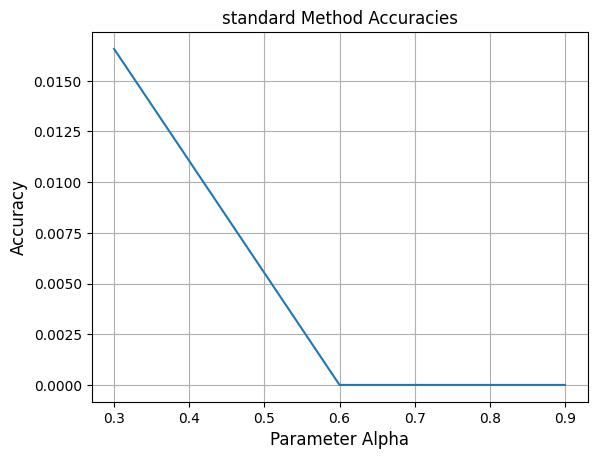

Fold 1
Accuracy for fold 1 is 0.52 

F1 Score for fold 1 is 0.51 

Fold 2
Accuracy for fold 2 is 0.48 

F1 Score for fold 2 is 0.47 

Accuracy for fcalc(method=standard-support, alpha=0.3): 0.502390331557702
F1 Score for fcalc(method=standard-support, alpha=0.3): 0.489523354770542
Fold 1
Accuracy for fold 1 is 0.52 

F1 Score for fold 1 is 0.51 

Fold 2
Accuracy for fold 2 is 0.49 

F1 Score for fold 2 is 0.47 

Accuracy for fcalc(method=standard-support, alpha=0.6): 0.5054432916280578
F1 Score for fcalc(method=standard-support, alpha=0.6): 0.49217232683869555
Fold 1
Accuracy for fold 1 is 0.52 

F1 Score for fold 1 is 0.51 

Fold 2
Accuracy for fold 2 is 0.49 

F1 Score for fold 2 is 0.47 

Accuracy for fcalc(method=standard-support, alpha=0.9): 0.5054432916280578
F1 Score for fcalc(method=standard-support, alpha=0.9): 0.49217232683869555


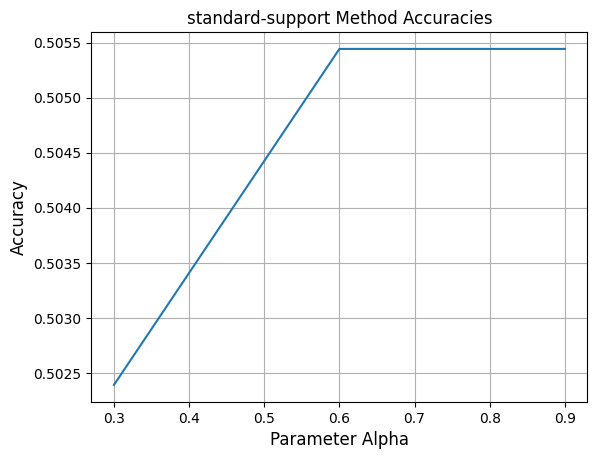

Fold 1
Accuracy for fold 1 is 0.48 

F1 Score for fold 1 is 0.47 

Fold 2
Accuracy for fold 2 is 0.49 

F1 Score for fold 2 is 0.49 

Accuracy for fcalc(method=ratio-support, alpha=0.3): 0.4836484432414174
F1 Score for fcalc(method=ratio-support, alpha=0.3): 0.47876908328643036
Fold 1
Accuracy for fold 1 is 0.46 

F1 Score for fold 1 is 0.45 

Fold 2
Accuracy for fold 2 is 0.49 

F1 Score for fold 2 is 0.49 

Accuracy for fcalc(method=ratio-support, alpha=0.6): 0.4749289062749627
F1 Score for fcalc(method=ratio-support, alpha=0.6): 0.47000614896001414
Fold 1
Accuracy for fold 1 is 0.47 

F1 Score for fold 1 is 0.47 

Fold 2
Accuracy for fold 2 is 0.49 

F1 Score for fold 2 is 0.47 

Accuracy for fcalc(method=ratio-support, alpha=0.9): 0.4788544666943586
F1 Score for fcalc(method=ratio-support, alpha=0.9): 0.4696401780096483


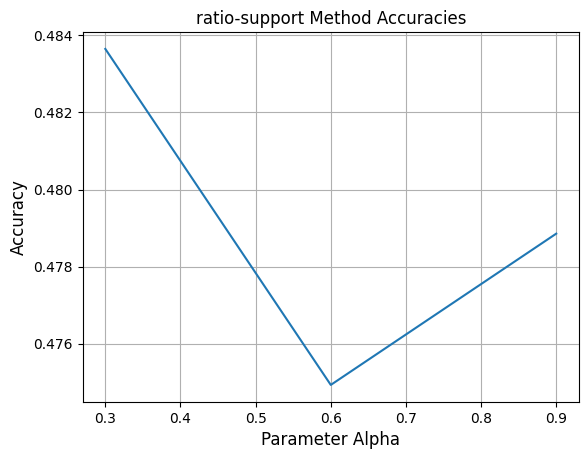

AttributeError: module 'fcalc.classifier' has no attribute 'BinarizedBinaryClPatternBinaryClassifierassifier'

In [28]:
fcals_flow(water_potability_X_train, water_potability_y_train, water_potability_X_test, water_potability_y_test, alphas=[0.3, 0.6, 0.9])

We already can say that the Template based FCALC is much more stable on classification, cause we got much higher F1 score, comparing to binary one in previous task. But accuracy, vise versa, being not so good.

## Stoke prediction

First of all, removing useless columns (relying on feature importance of classificators from previous project part) and binarizing the rest.

In [59]:
stroke_prediction_data = stroke_prediction_data.drop(['id'], axis=1)

#stroke_prediction_data = stroke_prediction_data.astype(bool)

In [60]:
stroke_prediction_target = stroke_prediction_data['stroke']
stroke_prediction_data = stroke_prediction_data.drop(columns = ['stroke'], axis = 1)

_, stroke_prediction_data, _, stroke_prediction_target = train_test_split(stroke_prediction_data, stroke_prediction_target, test_size=.40)
stroke_prediction_X_train, stroke_prediction_X_test, stroke_prediction_y_train, stroke_prediction_y_test = train_test_split(stroke_prediction_data, stroke_prediction_target, test_size=.3)

Fold 1
Accuracy for fold 1 is 0.06 

F1 Score for fold 1 is 0.06 

Fold 2
Accuracy for fold 2 is 0.06 

F1 Score for fold 2 is 0.08 

Accuracy for fcalc(method=standard, alpha=0.3): 0.06363636363636363
F1 Score for fcalc(method=standard, alpha=0.3): 0.07261514558228568
Fold 1
Accuracy for fold 1 is 0.01 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.6): 0.004195804195804196
F1 Score for fcalc(method=standard, alpha=0.6): 0.0029354559602424958
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.9): 0.0
F1 Score for fcalc(method=standard, alpha=0.9): 0.0


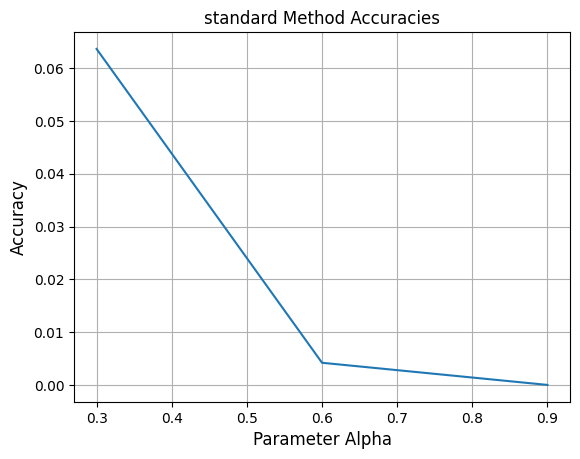

Fold 1
Accuracy for fold 1 is 0.08 

F1 Score for fold 1 is 0.08 

Fold 2
Accuracy for fold 2 is 0.10 

F1 Score for fold 2 is 0.10 

Accuracy for fcalc(method=standard-support, alpha=0.3): 0.09020979020979021
F1 Score for fcalc(method=standard-support, alpha=0.3): 0.09003743085291785
Fold 1
Accuracy for fold 1 is 0.08 

F1 Score for fold 1 is 0.08 

Fold 2
Accuracy for fold 2 is 0.09 

F1 Score for fold 2 is 0.09 

Accuracy for fcalc(method=standard-support, alpha=0.6): 0.08391608391608392
F1 Score for fcalc(method=standard-support, alpha=0.6): 0.0836131461131461
Fold 1
Accuracy for fold 1 is 0.08 

F1 Score for fold 1 is 0.08 

Fold 2
Accuracy for fold 2 is 0.08 

F1 Score for fold 2 is 0.08 

Accuracy for fcalc(method=standard-support, alpha=0.9): 0.08321678321678322
F1 Score for fcalc(method=standard-support, alpha=0.9): 0.08288940570865862


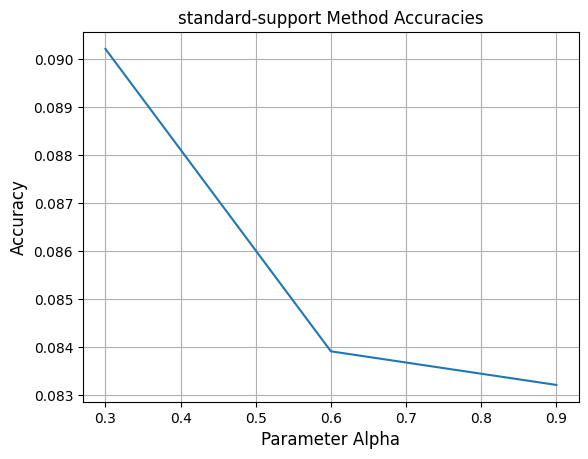

Fold 1
Accuracy for fold 1 is 0.55 

F1 Score for fold 1 is 0.43 

Fold 2
Accuracy for fold 2 is 0.44 

F1 Score for fold 2 is 0.37 

Accuracy for fcalc(method=ratio-support, alpha=0.3): 0.4965034965034965
F1 Score for fcalc(method=ratio-support, alpha=0.3): 0.40210368139904673
Fold 1
Accuracy for fold 1 is 0.63 

F1 Score for fold 1 is 0.48 

Fold 2
Accuracy for fold 2 is 0.61 

F1 Score for fold 2 is 0.46 

Accuracy for fcalc(method=ratio-support, alpha=0.6): 0.6160839160839161
F1 Score for fcalc(method=ratio-support, alpha=0.6): 0.46990765711073906
Fold 1
Accuracy for fold 1 is 0.67 

F1 Score for fold 1 is 0.49 

Fold 2
Accuracy for fold 2 is 0.69 

F1 Score for fold 2 is 0.51 

Accuracy for fcalc(method=ratio-support, alpha=0.9): 0.676923076923077
F1 Score for fcalc(method=ratio-support, alpha=0.9): 0.503033878107178


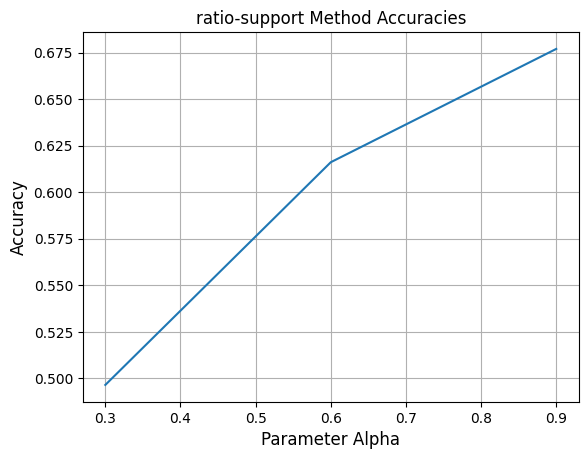

fcalc(method=ratio-support, alpha=0.9) test Accuracy: 0.741042345276873
fcalc(method=ratio-support, alpha=0.9) test F1 Score: 0.561324124791617


In [61]:
fcals_flow(stroke_prediction_X_train, stroke_prediction_y_train, stroke_prediction_X_test, stroke_prediction_y_test, alphas=[0.3, 0.6, 0.9], categorical=[0, 5, 6, 9])

Kinda bad results... But F1-Score is better than on water potability classification huh :))

I used thresholds for binarization relying on official papers about strokes, so maybe it is impossible to binarize age, glucose level and BMI by one threshold... Interesting results to think of

## wine quality classification
Now let's try to classify wine quality!

First of all, removing useless columns (relying on feature importance of classificators from previous project part) and binarizing the rest.

In [45]:
wine_quality_data['quality'] = Binarizer(threshold=5).fit_transform([wine_quality_data['quality']])[0]
wine_quality_data = wine_quality_data.drop(['Unnamed: 0', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'chlorides', 'total sulfur dioxide', 'pH', 'Type'], axis=1)

#wine_quality_data = wine_quality_data.astype(bool)

In [46]:
wine_quality_target = wine_quality_data['quality']
wine_quality_data = wine_quality_data.drop(columns = ['quality'], axis = 1)

_, wine_quality_data, _, wine_quality_target = train_test_split(wine_quality_data, wine_quality_target, test_size=.15)
wine_quality_X_train, wine_quality_X_test, wine_quality_y_train, wine_quality_y_test = train_test_split(wine_quality_data, wine_quality_target, test_size=.3)

Fold 1
Accuracy for fold 1 is 0.13 

F1 Score for fold 1 is 0.13 

Fold 2
Accuracy for fold 2 is 0.16 

F1 Score for fold 2 is 0.15 

Accuracy for fcalc(method=standard, alpha=0.3): 0.14248503642483146
F1 Score for fcalc(method=standard, alpha=0.3): 0.14252743239905907
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.01 

Fold 2
Accuracy for fold 2 is 0.01 

F1 Score for fold 2 is 0.02 

Accuracy for fcalc(method=standard, alpha=0.6): 0.008796278788337178
F1 Score for fcalc(method=standard, alpha=0.6): 0.013751090811690661
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.9): 0.0
F1 Score for fcalc(method=standard, alpha=0.9): 0.0


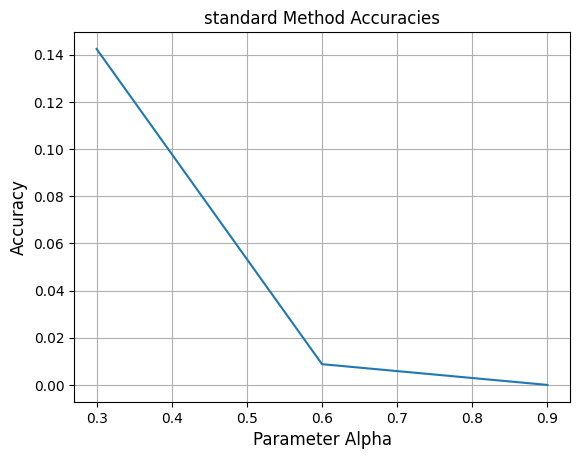

Fold 1
Accuracy for fold 1 is 0.44 

F1 Score for fold 1 is 0.43 

Fold 2
Accuracy for fold 2 is 0.42 

F1 Score for fold 2 is 0.42 

Accuracy for fcalc(method=standard-support, alpha=0.3): 0.4309550903658985
F1 Score for fcalc(method=standard-support, alpha=0.3): 0.4241534901534211
Fold 1
Accuracy for fold 1 is 0.44 

F1 Score for fold 1 is 0.43 

Fold 2
Accuracy for fold 2 is 0.42 

F1 Score for fold 2 is 0.42 

Accuracy for fcalc(method=standard-support, alpha=0.6): 0.42831699745249646
F1 Score for fcalc(method=standard-support, alpha=0.6): 0.42456865988058945
Fold 1
Accuracy for fold 1 is 0.44 

F1 Score for fold 1 is 0.43 

Fold 2
Accuracy for fold 2 is 0.42 

F1 Score for fold 2 is 0.42 

Accuracy for fcalc(method=standard-support, alpha=0.9): 0.42802391421685754
F1 Score for fcalc(method=standard-support, alpha=0.9): 0.424331762340947


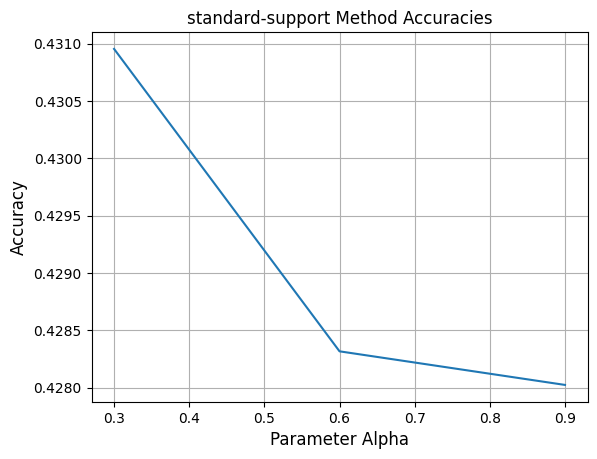

Fold 1
Accuracy for fold 1 is 0.52 

F1 Score for fold 1 is 0.50 

Fold 2
Accuracy for fold 2 is 0.47 

F1 Score for fold 2 is 0.44 

Accuracy for fcalc(method=ratio-support, alpha=0.3): 0.49134416050991325
F1 Score for fcalc(method=ratio-support, alpha=0.3): 0.47146126281626954
Fold 1
Accuracy for fold 1 is 0.51 

F1 Score for fold 1 is 0.50 

Fold 2
Accuracy for fold 2 is 0.47 

F1 Score for fold 2 is 0.45 

Accuracy for fcalc(method=ratio-support, alpha=0.6): 0.49105245244488144
F1 Score for fcalc(method=ratio-support, alpha=0.6): 0.4719722257530154
Fold 1
Accuracy for fold 1 is 0.62 

F1 Score for fold 1 is 0.62 

Fold 2
Accuracy for fold 2 is 0.60 

F1 Score for fold 2 is 0.60 

Accuracy for fcalc(method=ratio-support, alpha=0.9): 0.6100825789949567
F1 Score for fcalc(method=ratio-support, alpha=0.9): 0.6098643305549271


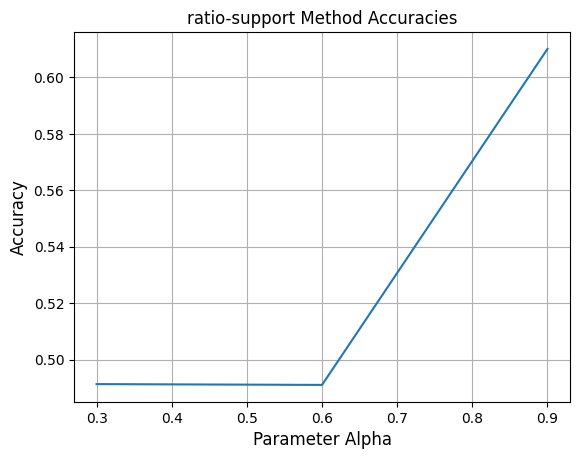

fcalc(method=ratio-support, alpha=0.9) test Accuracy: 0.6183310533515732
fcalc(method=ratio-support, alpha=0.9) test F1 Score: 0.6177294197031039


In [47]:
fcals_flow(wine_quality_X_train, wine_quality_y_train, wine_quality_X_test, wine_quality_y_test, alphas=[0.3, 0.6, 0.9], categorical=[-1])

Quite good results! And this time 'good' can be applied for both accuracy and macro f1-score, wow

P.S. for this dataset I used only 15 percent of it cause it is extremely huge and the one Fold of cross-validation alone took over 40 minutes (And I have 15 models in my grid search with 5 folds each...)
P.P.S. And it has this good results after training on 15% of the whole dataset!!